# Lung cancer prediction project

Code to read the dataset, replace categorical features, scale age in a 0-1 range, define X and y, and split the dataset into training and testing data.
Executable code below ⬇

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv('survey lung cancer.csv')
data.replace({1: 0, 2: 1}, inplace=True)
data['LUNG_CANCER'].replace({'YES': 1, 'NO': 0}, inplace=True)
data['GENDER'].replace({'M': 1, 'F': 0}, inplace=True)
scaler = MinMaxScaler(feature_range =(0, 1))
age = data['AGE'].values
data['AGE'] = scaler.fit_transform(age.reshape(-1, 1))
data.drop(data[data['AGE']<0.3].index, inplace=True)
y= data['LUNG_CANCER']
X=data.drop(['LUNG_CANCER'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=data.LUNG_CANCER)

The best model found for this case was the following:

In [6]:
rand_for_clas = RandomForestClassifier(max_depth=11, max_features=3, max_samples=0.8, n_estimators=100)
rand_for_clas.fit(X_train, y_train)
predictions = rand_for_clas.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.94      1.00      0.97        81

    accuracy                           0.95        92
   macro avg       0.97      0.77      0.84        92
weighted avg       0.95      0.95      0.94        92



### Process done during project development

Read and explore dataset:

In [2]:
data = pd.read_csv('survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [114]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Handle binary categorical features:

In [3]:
data.replace({1: 0, 2: 1}, inplace=True)

In [4]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [5]:
data['LUNG_CANCER'].replace({'YES': 1, 'NO': 0}, inplace=True)

In [118]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [6]:
data['GENDER'].replace({'M': 1, 'F': 0}, inplace=True)

In [7]:
scaler = MinMaxScaler(feature_range =(0, 1))
age = data['AGE'].values
data['AGE'] = scaler.fit_transform(age.reshape(-1, 1))
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.727273,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0.803030,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0.575758,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.636364,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.636364,0,1,0,0,0,0,0,1,0,1,1,0,0,0


EDA:

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

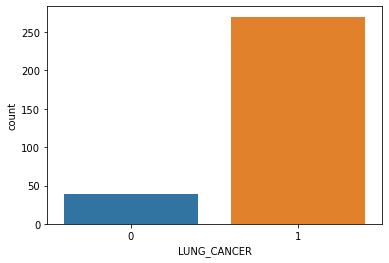

In [90]:
sns.countplot(data=data, x='LUNG_CANCER')

<AxesSubplot:>

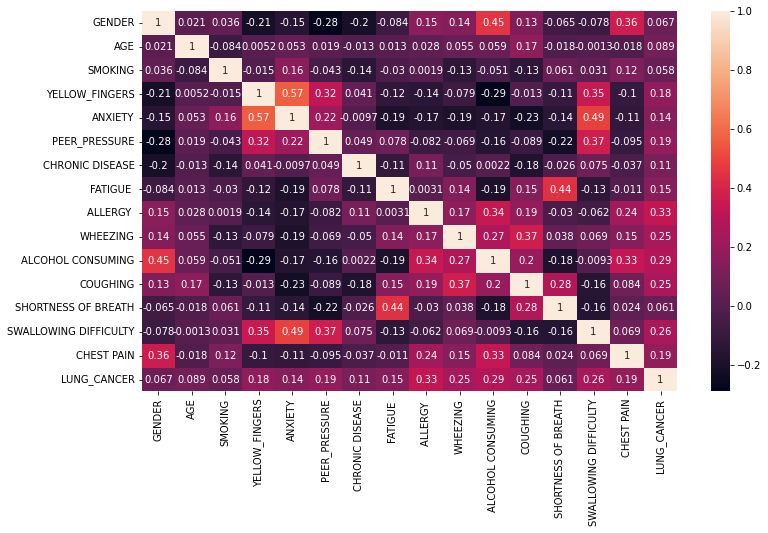

In [121]:
corr = data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)

In [122]:
corr['LUNG_CANCER'].sort_values()

SMOKING                  0.058179
SHORTNESS OF BREATH      0.060738
GENDER                   0.067254
AGE                      0.089465
CHRONIC DISEASE          0.110891
ANXIETY                  0.144947
FATIGUE                  0.150673
YELLOW_FINGERS           0.181339
PEER_PRESSURE            0.186388
CHEST PAIN               0.190451
COUGHING                 0.248570
WHEEZING                 0.249300
SWALLOWING DIFFICULTY    0.259730
ALCOHOL CONSUMING        0.288533
ALLERGY                  0.327766
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64

<AxesSubplot:xlabel='AGE', ylabel='Count'>

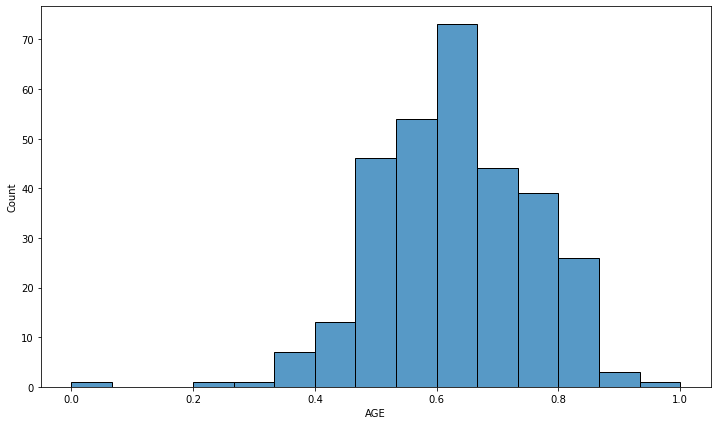

In [123]:
plt.figure(figsize=(12,7))
sns.histplot(data=data, x='AGE', bins=15)

<AxesSubplot:xlabel='SMOKING', ylabel='count'>

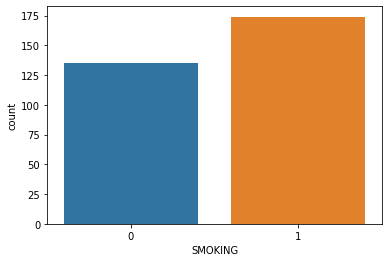

In [124]:
sns.countplot(data=data, x='SMOKING')

In [14]:
corr = data.corr()
corr['LUNG_CANCER'].sort_values()

SMOKING                  0.058179
SHORTNESS OF BREATH      0.060738
GENDER                   0.067254
AGE                      0.089465
CHRONIC DISEASE          0.110891
ANXIETY                  0.144947
FATIGUE                  0.150673
YELLOW_FINGERS           0.181339
PEER_PRESSURE            0.186388
CHEST PAIN               0.190451
COUGHING                 0.248570
WHEEZING                 0.249300
SWALLOWING DIFFICULTY    0.259730
ALCOHOL CONSUMING        0.288533
ALLERGY                  0.327766
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64

Feature engineering to explore age deeply:

In [15]:
def age_3_bins(age):
    if age <51:
        return 0
    elif age >50 and age <65:
        return 1
    else:
        return 2

In [16]:
data['edad_3_bins'] = data['AGE'].apply(age_3_bins)

In [17]:
def age_7_bins(age):
    if age <31:
        return 0
    elif age >30 and age <41:
        return 1
    elif age >40 and age <51:
        return 2
    elif age >50 and age <61:
        return 3
    elif age >60 and age <71:
        return 4
    elif age >70 and age <81:
        return 5
    else:
        return 6

In [18]:
data['edad_7_bins'] = data['AGE'].apply(age_7_bins)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,edad_3_bins,edad_7_bins
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1,2,4
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1,2,5
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,3
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,4
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,4


In [125]:
corr = data.corr()
corr['LUNG_CANCER'].sort_values()

SMOKING                  0.058179
SHORTNESS OF BREATH      0.060738
GENDER                   0.067254
AGE                      0.089465
CHRONIC DISEASE          0.110891
ANXIETY                  0.144947
FATIGUE                  0.150673
YELLOW_FINGERS           0.181339
PEER_PRESSURE            0.186388
CHEST PAIN               0.190451
COUGHING                 0.248570
WHEEZING                 0.249300
SWALLOWING DIFFICULTY    0.259730
ALCOHOL CONSUMING        0.288533
ALLERGY                  0.327766
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64

In [20]:
def older(age):    
    return 65 if age >64 else age

In [21]:
data['AGE'] = data['AGE'].apply(older)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,edad_3_bins,edad_7_bins
0,1,65,0,1,1,0,0,1,0,1,1,1,1,1,1,1,2,4
1,1,65,1,0,0,0,1,1,1,0,0,0,1,1,1,1,2,5
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,3
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,4
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,4


In [126]:
corr = data.corr()
corr['LUNG_CANCER'].sort_values()

SMOKING                  0.058179
SHORTNESS OF BREATH      0.060738
GENDER                   0.067254
AGE                      0.089465
CHRONIC DISEASE          0.110891
ANXIETY                  0.144947
FATIGUE                  0.150673
YELLOW_FINGERS           0.181339
PEER_PRESSURE            0.186388
CHEST PAIN               0.190451
COUGHING                 0.248570
WHEEZING                 0.249300
SWALLOWING DIFFICULTY    0.259730
ALCOHOL CONSUMING        0.288533
ALLERGY                  0.327766
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64

EDA:

<AxesSubplot:xlabel='SMOKING', ylabel='count'>

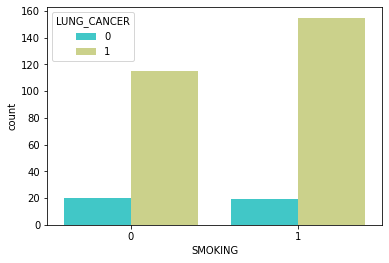

In [23]:
sns.countplot(data=data, x='SMOKING', hue='LUNG_CANCER', palette='rainbow')

<AxesSubplot:xlabel='SHORTNESS OF BREATH', ylabel='count'>

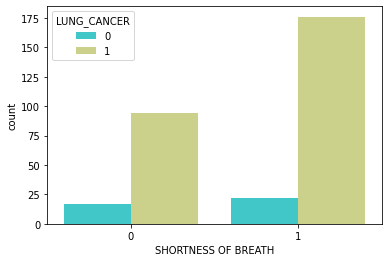

In [24]:
sns.countplot(data=data, x='SHORTNESS OF BREATH', hue='LUNG_CANCER', palette='rainbow')

<AxesSubplot:xlabel='GENDER', ylabel='count'>

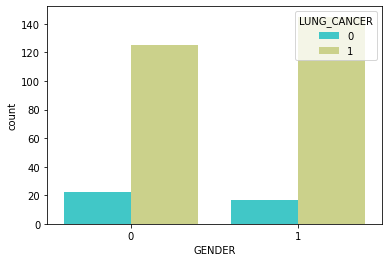

In [25]:
sns.countplot(data=data, x='GENDER', hue='LUNG_CANCER', palette='rainbow')

C:\Users\nadina.bajaroff\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

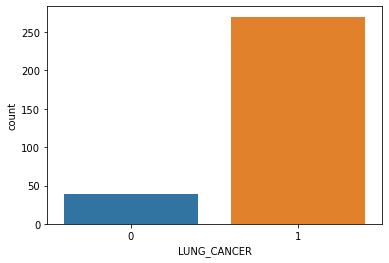

In [26]:
sns.countplot(data['LUNG_CANCER'])

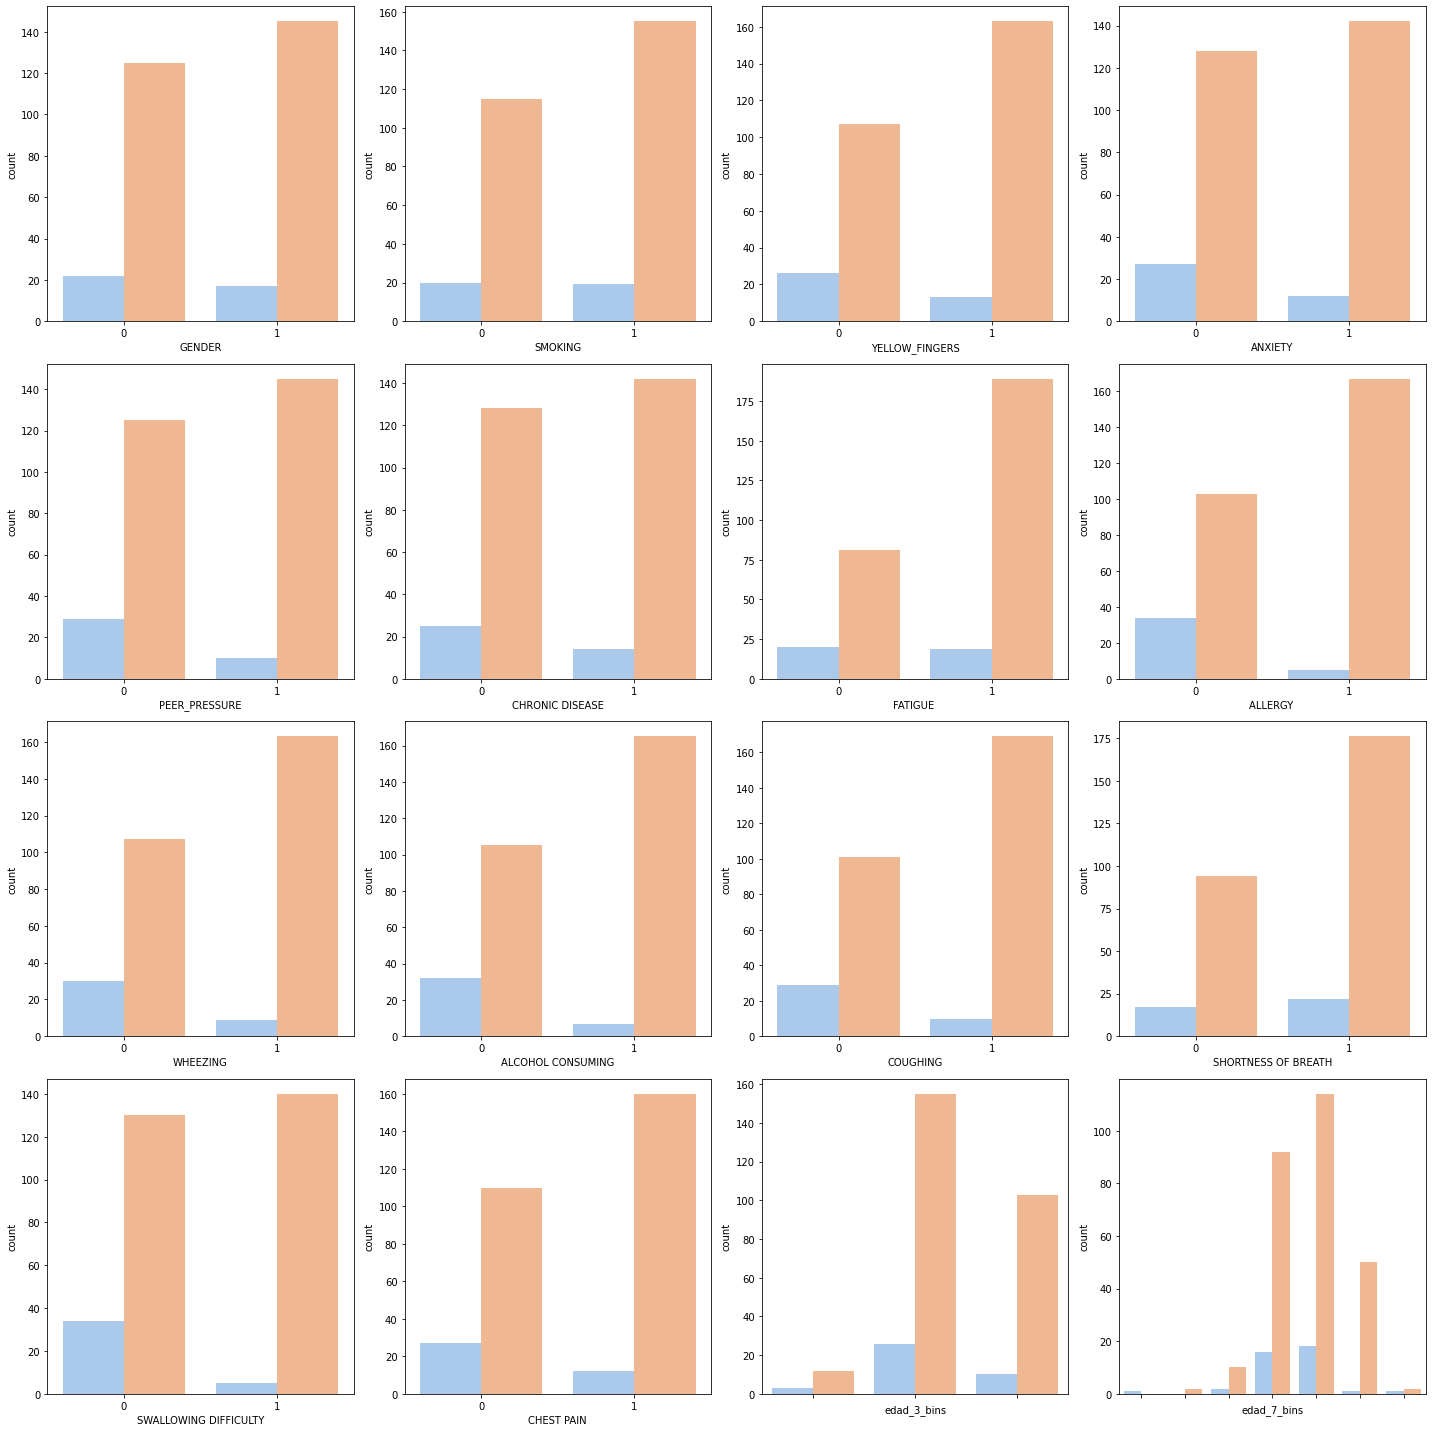

In [28]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.ravel()

features = data.drop(['LUNG_CANCER', 'AGE'], axis=1)

for i, col in enumerate(features):
    ax = sns.countplot(x=col, data=data, hue='LUNG_CANCER', ax=axs[i], palette='pastel')
    ax.legend().remove()

# Remove the x-tick labels for all subplots except the bottom row
for ax in axs[-2:]:
    ax.set_xticklabels([])

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='edad_3_bins'>

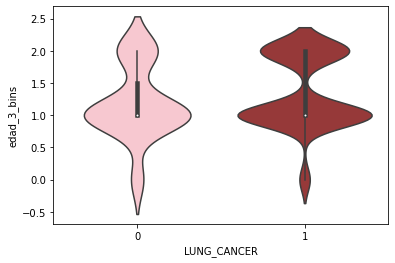

In [29]:
sns.violinplot(x='LUNG_CANCER', y='edad_3_bins', data=data, palette=['pink', 'brown'])

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='edad_7_bins'>

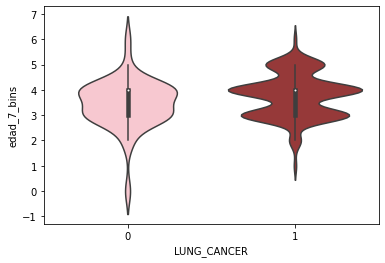

In [30]:
sns.violinplot(x='LUNG_CANCER', y='edad_7_bins', data=data, palette=['pink', 'brown'])

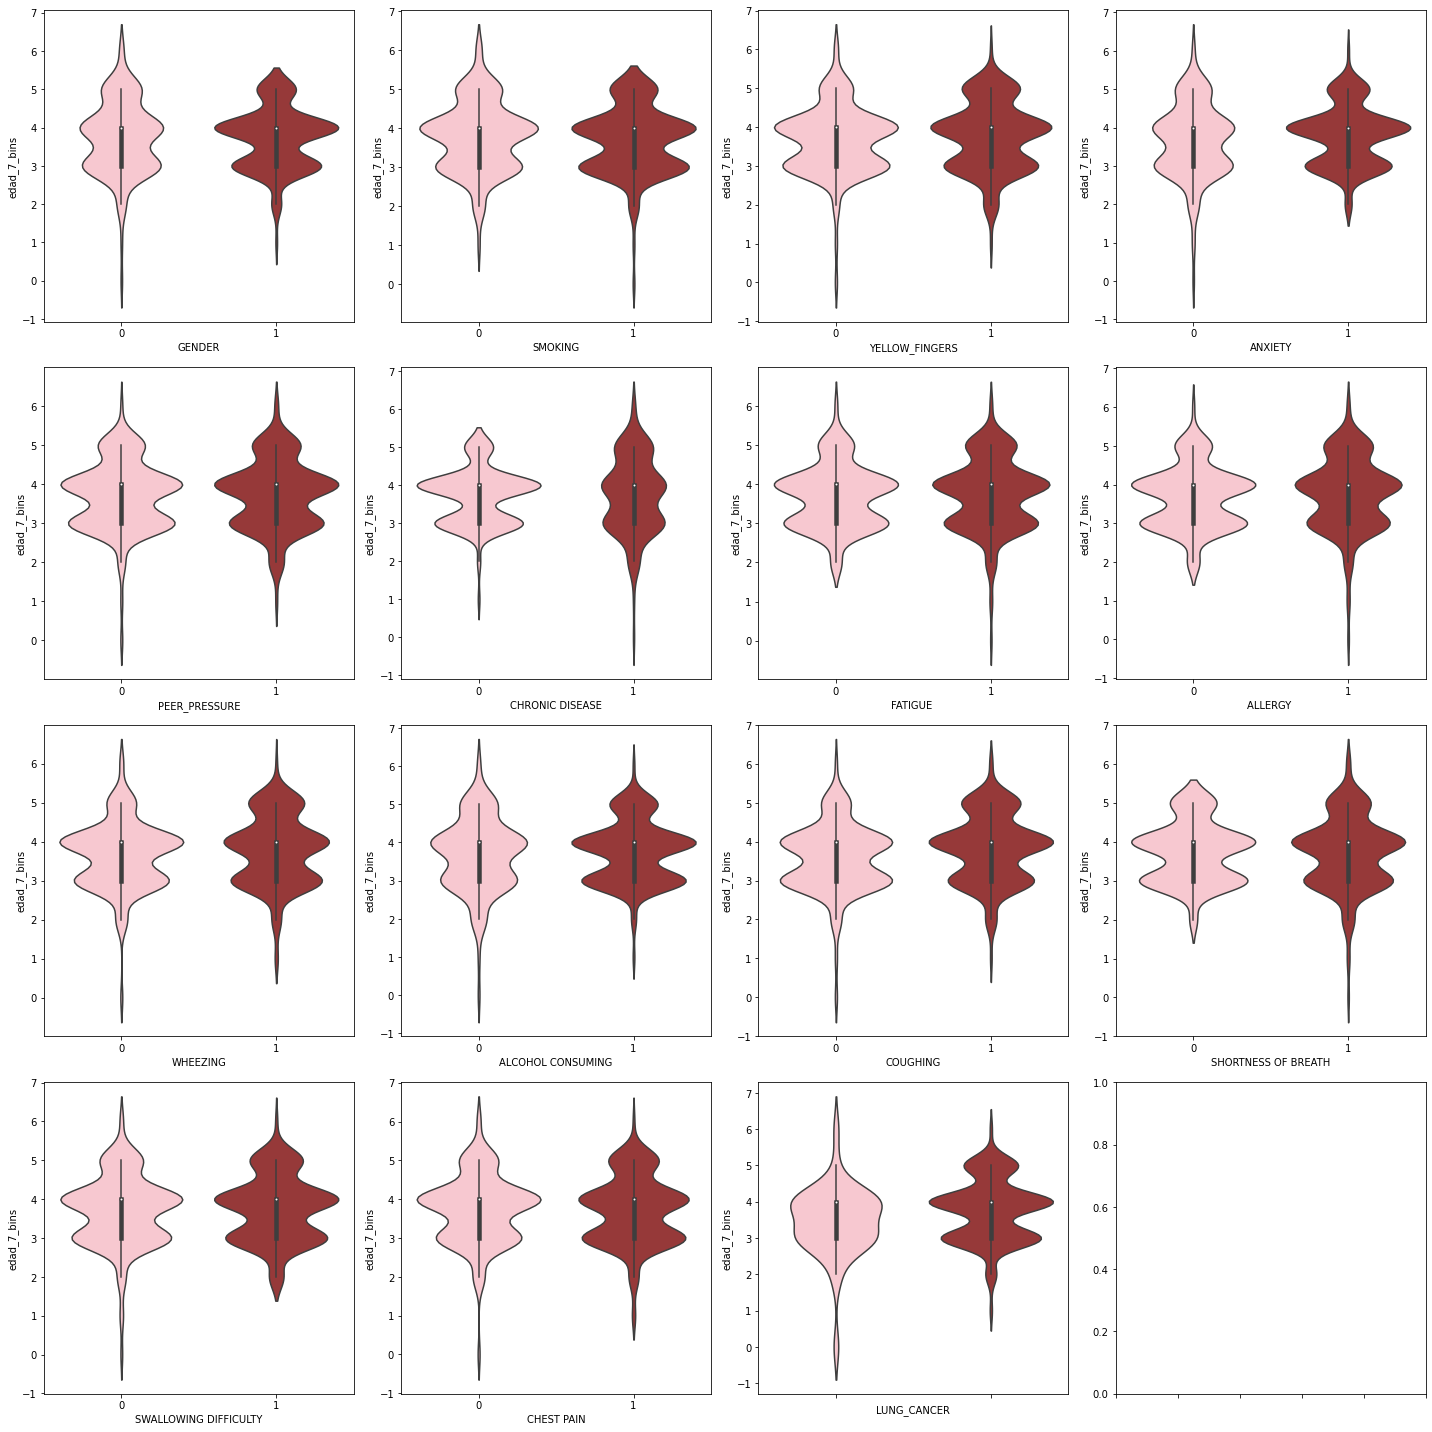

In [31]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.ravel()

features = data.drop(['edad_7_bins', 'edad_3_bins', 'AGE'], axis=1)

for i, col in enumerate(features):
    ax = sns.violinplot(x=col, y='edad_7_bins', data=data, ax=axs[i], palette=['pink', 'brown'])
    #ax.legend().remove()

# Remove the x-tick labels for all subplots except the bottom row
for ax in axs[-2:]:
    ax.set_xticklabels([])

plt.tight_layout()
plt.show()

Testing different models. For this case the best metric to consider is recall, since the most important thing is to maximize true positives and minimize false negatives

In [12]:
y= data['LUNG_CANCER']
X=data.drop(['LUNG_CANCER'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Logistic Regression 

In [14]:
logreg = LogisticRegression()

In [15]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
predictions = logreg.predict(X_test)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.92      0.99      0.95        78

    accuracy                           0.91        93
   macro avg       0.90      0.76      0.81        93
weighted avg       0.91      0.91      0.90        93



<AxesSubplot:xlabel='SMOKING', ylabel='count'>

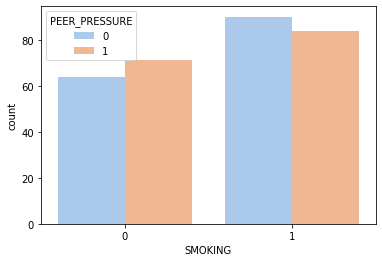

In [38]:
sns.countplot(x='SMOKING', data=data, hue='PEER_PRESSURE', palette='pastel')

In [17]:
## data stratification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=data.LUNG_CANCER)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.94      1.00      0.97        81

    accuracy                           0.95        93
   macro avg       0.97      0.79      0.85        93
weighted avg       0.95      0.95      0.94        93



In [40]:
X_train_older = X_train[X_train.edad_7_bins > 1]

In [10]:
X_train_older, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=data.LUNG_CANCER)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(classification_report(y_test, predictions))

NameError: name 'X' is not defined

#### Decision trees and Random forests 

In [18]:
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [19]:
dtree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
predictionsDT = dtree.predict(X_test)
predictionsRF = rfc.predict(X_test)

In [45]:
print(classification_report(y_test,predictionsDT))
print(classification_report(y_test,predictionsRF))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        12
           1       0.92      0.88      0.90        81

    accuracy                           0.83        93
   macro avg       0.65      0.69      0.66        93
weighted avg       0.85      0.83      0.84        93

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.91      1.00      0.95        81

    accuracy                           0.91        93
   macro avg       0.96      0.67      0.73        93
weighted avg       0.92      0.91      0.89        93



In [46]:
# twicking the RFC model
rfc2 = RandomForestClassifier(n_estimators=200)
rfc2.fit(X_train, y_train)
predictionsRF2 = rfc2.predict(X_test)
print(classification_report(y_test,predictionsRF2))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.93      1.00      0.96        81

    accuracy                           0.94        93
   macro avg       0.97      0.75      0.82        93
weighted avg       0.94      0.94      0.93        93



In [21]:
hyperparameters = {'n_estimators':[100,200,300,500,1000]}

rfc3 = RandomForestClassifier()
gs = GridSearchCV(estimator=rfc3, param_grid=hyperparameters, n_jobs=-1)

In [22]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 500, 1000]})

In [23]:
gs.best_params_

{'n_estimators': 300}

In [50]:
gs.score(X_test, y_test)

0.9247311827956989

In [141]:
rfc4 = RandomForestClassifier(n_estimators=300)
rfc4.fit(X_train, y_train)
predictionsRF4 = rfc4.predict(X_test)
print(classification_report(y_test,predictionsRF4))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.95      1.00      0.98        81

    accuracy                           0.96        93
   macro avg       0.98      0.83      0.89        93
weighted avg       0.96      0.96      0.95        93



In [6]:
hyperparameters = {'n_estimators':[100,200,300,500,1000],
                   'max_samples':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                   'max_features':[1,2,3,4,5,6,7],
                   'max_depth':[None,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

rfc5 = RandomForestClassifier()
gs = GridSearchCV(estimator=rfc5, param_grid=hyperparameters, n_jobs=-1)

gs.fit(X_train, y_train)
print(gs.best_params_)
gs.score(X_test, y_test)

{'max_depth': 11, 'max_features': 3, 'max_samples': 0.8, 'n_estimators': 100}


0.9354838709677419

In [5]:
rfc6 = RandomForestClassifier(max_depth=11, max_features=3, max_samples=0.8, n_estimators=100)
rfc6.fit(X_train, y_train)
predictionsRF6 = rfc6.predict(X_test)
print(classification_report(y_test,predictionsRF6))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.95      1.00      0.98        81

    accuracy                           0.96        93
   macro avg       0.98      0.83      0.89        93
weighted avg       0.96      0.96      0.95        93



In [144]:
hyperparameters = {'max_features':[1,2,3,4,5,6,7]}

rfc7 = RandomForestClassifier()
gs = GridSearchCV(estimator=rfc7, param_grid=hyperparameters, n_jobs=-1)

gs.fit(X_train, y_train)
print(gs.best_params_)
gs.score(X_test, y_test)

{'max_features': 4}


0.946236559139785

In [145]:
rfc8 = RandomForestClassifier(n_estimators=300, max_samples=0.6, max_features=4)
rfc8.fit(X_train, y_train)
predictionsRF8 = rfc8.predict(X_test)
print(classification_report(y_test,predictionsRF8))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.93      1.00      0.96        81

    accuracy                           0.94        93
   macro avg       0.97      0.75      0.82        93
weighted avg       0.94      0.94      0.93        93



In [148]:
hyperparameters = {'max_depth':[None,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

rfc9 = RandomForestClassifier()
gs = GridSearchCV(estimator=rfc9, param_grid=hyperparameters, n_jobs=-1)

gs.fit(X_train, y_train)
print(gs.best_params_)
gs.score(X_test, y_test)

{'max_depth': 13}


0.956989247311828

In [151]:
rfc10 = RandomForestClassifier(n_estimators=300, max_samples=0.6, max_features=4, max_depth=20)
rfc10.fit(X_train, y_train)
predictionsRF10 = rfc10.predict(X_test)
print(classification_report(y_test,predictionsRF10))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.94      1.00      0.97        81

    accuracy                           0.95        93
   macro avg       0.97      0.79      0.85        93
weighted avg       0.95      0.95      0.94        93



#### XGBoost 

In [152]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
predictionsXGB = XGB.predict(X_test)
print(classification_report(y_test,predictionsXGB))

[16:46:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.91      0.96      0.93        81

    accuracy                           0.88        93
   macro avg       0.74      0.65      0.68        93
weighted avg       0.86      0.88      0.87        93



C:\Users\nadina.bajaroff\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nadina.bajaroff\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


#### Support vector machines 

In [132]:
SVC = SVC()
SVC.fit(X_train, y_train)
predictionsSVC = SVC.predict(X_test)
print(classification_report(y_test,predictionsSVC))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.92      1.00      0.96        81

    accuracy                           0.92        93
   macro avg       0.96      0.71      0.77        93
weighted avg       0.93      0.92      0.91        93

